In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from technical_indicators.indicators_df import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
aapl_15min = pd.read_pickle('./Data/AAPL_15Min.pkl')
#aapl_1h = pd.read_pickle('AAPL_1H.pkl')
#eurcad_1h = pd.read_pickle('EUR_CAD_H1.pkl')
#eurcad_5m = pd.read_pickle('EUR_CAD_M5.pkl')

In [3]:
aapl_15min.head()

,close,high,low,n,open,volume,vw
time,,,,,,,
2020-07-27 13:30:00+00:00,379.31,379.31,374.030,272,374.955,33871,376.767932
2020-07-27 13:45:00+00:00,377.74,379.40,377.415,242,379.385,43759,378.330149
2020-07-27 14:00:00+00:00,376.29,378.91,376.255,163,377.715,19843,377.745383
2020-07-27 14:15:00+00:00,376.85,377.58,376.020,133,376.040,10420,377.273273
2020-07-27 14:30:00+00:00,377.35,377.86,376.310,71,377.280,8495,377.038346


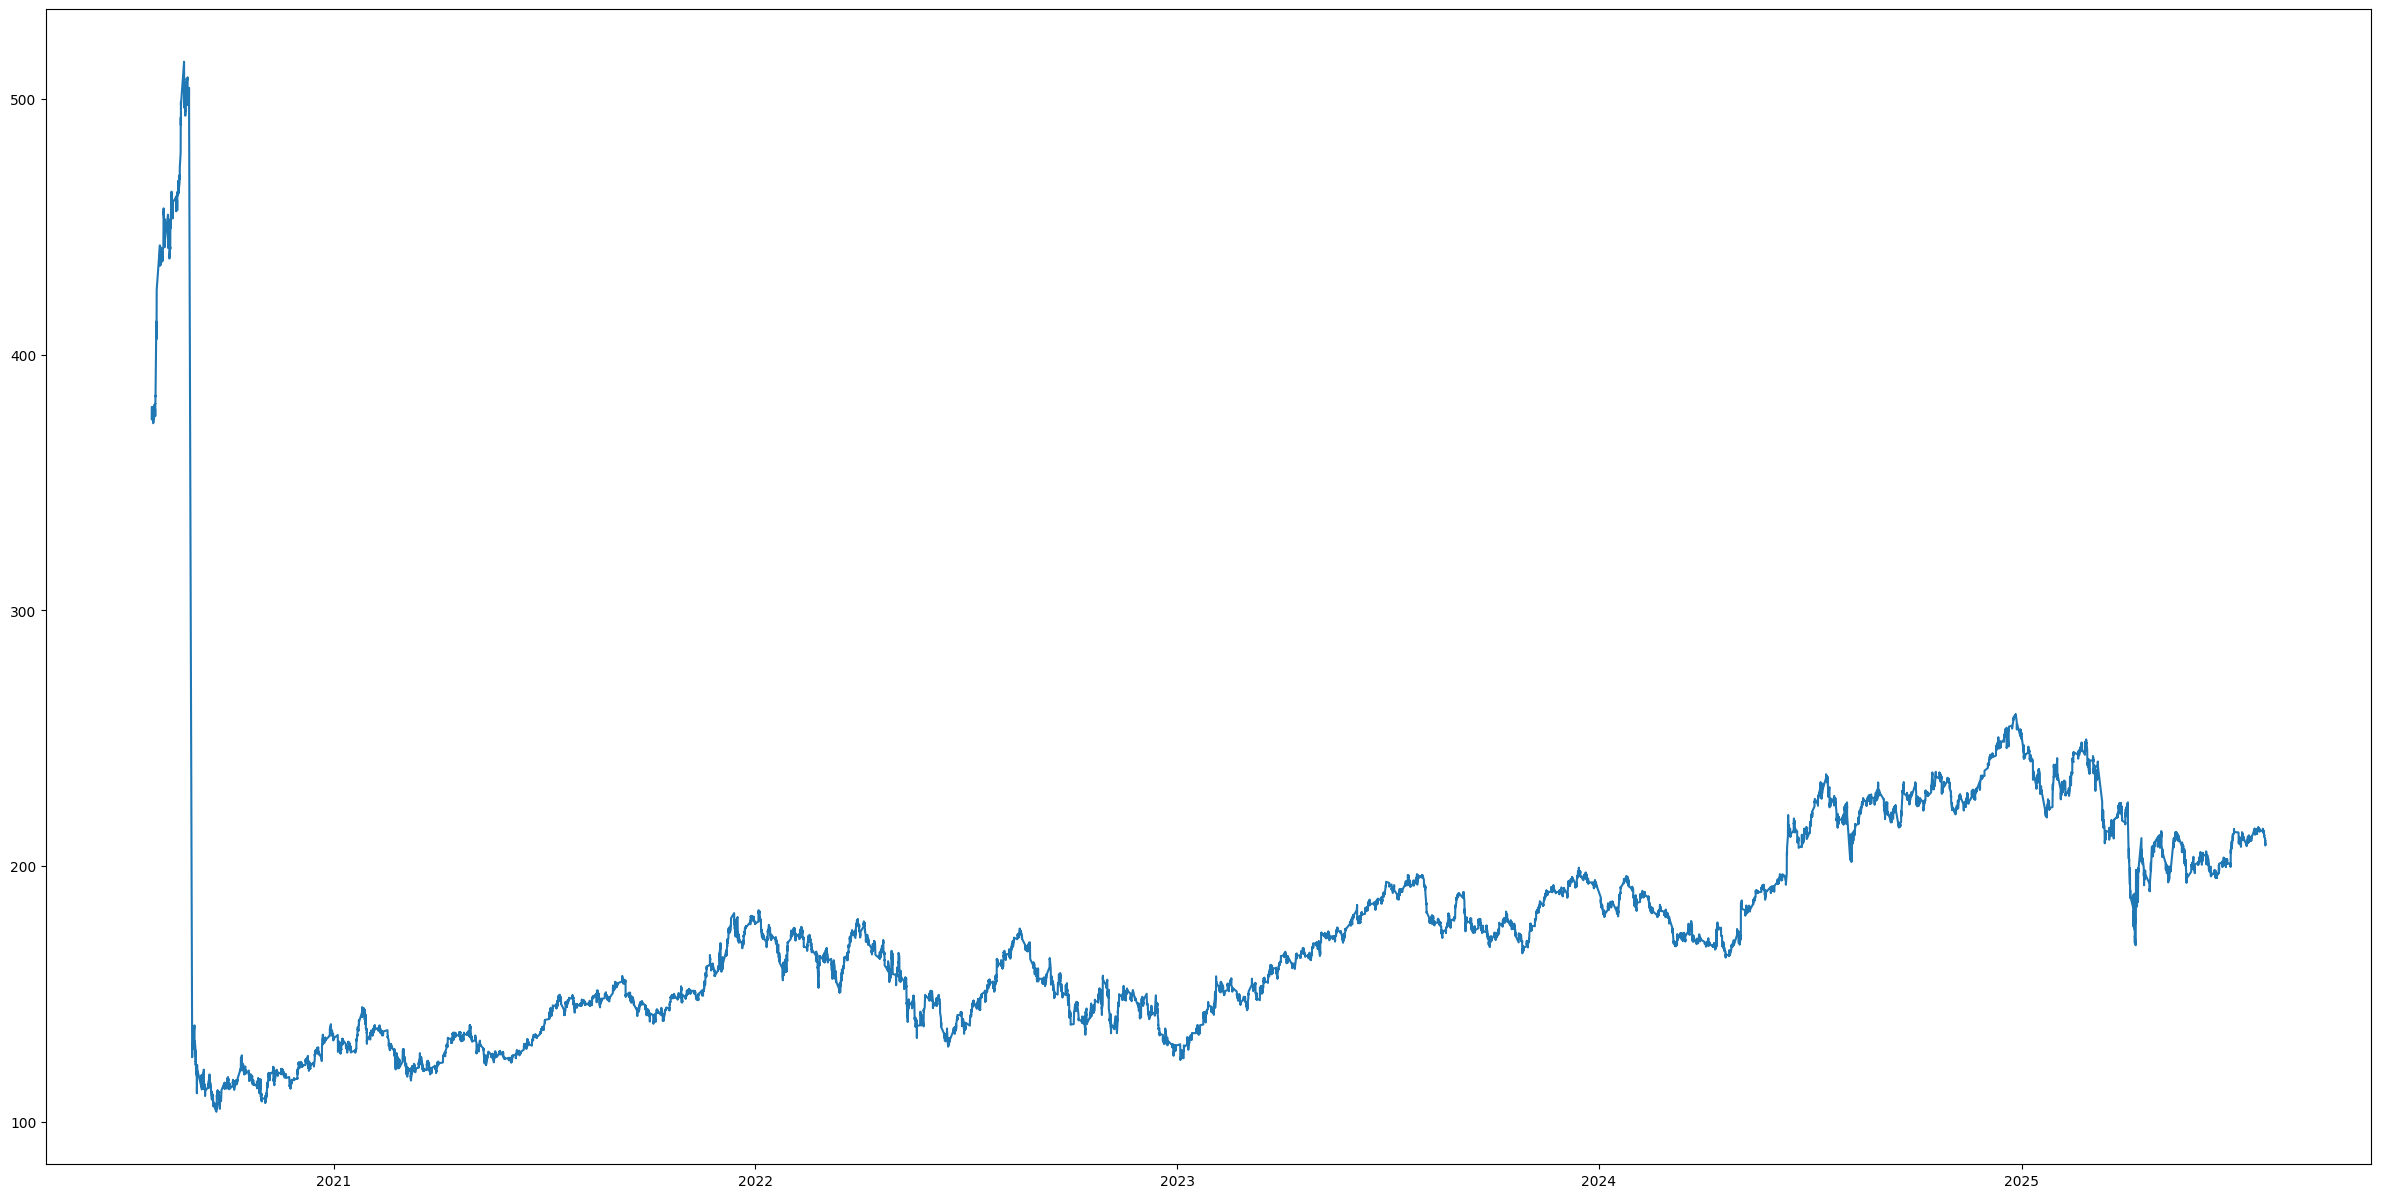

In [4]:
plt.figure(figsize=(30, 15))
plt.plot(aapl_15min.index, aapl_15min['close'])
plt.show()

In [5]:
# plt.figure(figsize=(30, 15))
# plt.plot(eurcad_1h['time'], eurcad_1h['mid_c'])
# plt.show()

### EXPLORATORY DATA ANALYSIS

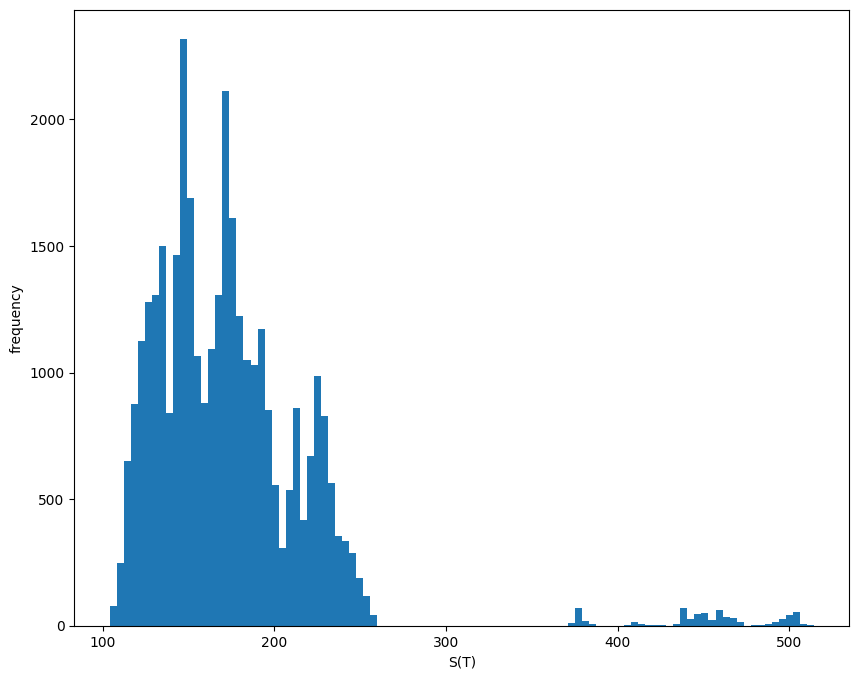

In [6]:
plt.figure(figsize=(10, 8))
plt.hist(aapl_15min['close'], bins=100)
plt.xlabel("S(T)")
plt.ylabel("frequency")
plt.show()

The range of prices in Apples data includes the data before the 4 to 1 stock split and after. so the range of available data is really large. Moving forward, I will cut off the before the split part of the data.

In [7]:
# plt.figure(figsize=(10, 8))
# plt.hist(eurcad_1h['mid_c'], bins=100)
# plt.xlabel("S(T)")
# plt.ylabel("frequency")
# plt.show()

For the eur_cad pair, majority of the data point lies between 1.45 and 1.55, with fewer observations outside this range.The diagram also hints at a multimodal distribution that signals multiple regimes at play.

In [8]:
# eurcad_1h[['mid_o', 'mid_c', 'mid_h', 'mid_l']].plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
# plt.show()

### AAPL Analysis

Asset type: Equity

In [9]:
#start_time = "2021-01-01 12:00"
#df_cut = aapl_15min[aapl_15min.index >= pd.to_datetime(start_time)].reset_index(drop=True)

start_time = pd.to_datetime("2021-01-01 12:00").tz_localize("UTC")
df_cut = aapl_15min[aapl_15min.index >= start_time].reset_index()

#apply return
df_cut['return'] = df_cut['close'].pct_change()

In [10]:
df_cut.head()

,time,close,high,low,n,open,volume,vw,return
0,2021-01-04 13:00:00+00:00,134.05,134.06,133.86,7,133.90,601,133.966667,NaN
1,2021-01-04 13:15:00+00:00,133.86,134.02,133.86,5,134.02,412,133.940000,-0.001417
2,2021-01-04 13:30:00+00:00,133.81,133.81,133.80,2,133.80,200,133.805000,-0.000374
3,2021-01-04 13:45:00+00:00,133.77,133.84,133.77,2,133.84,200,133.805000,-0.000299
4,2021-01-04 14:00:00+00:00,133.57,133.85,133.57,7,133.83,700,133.760000,-0.001495


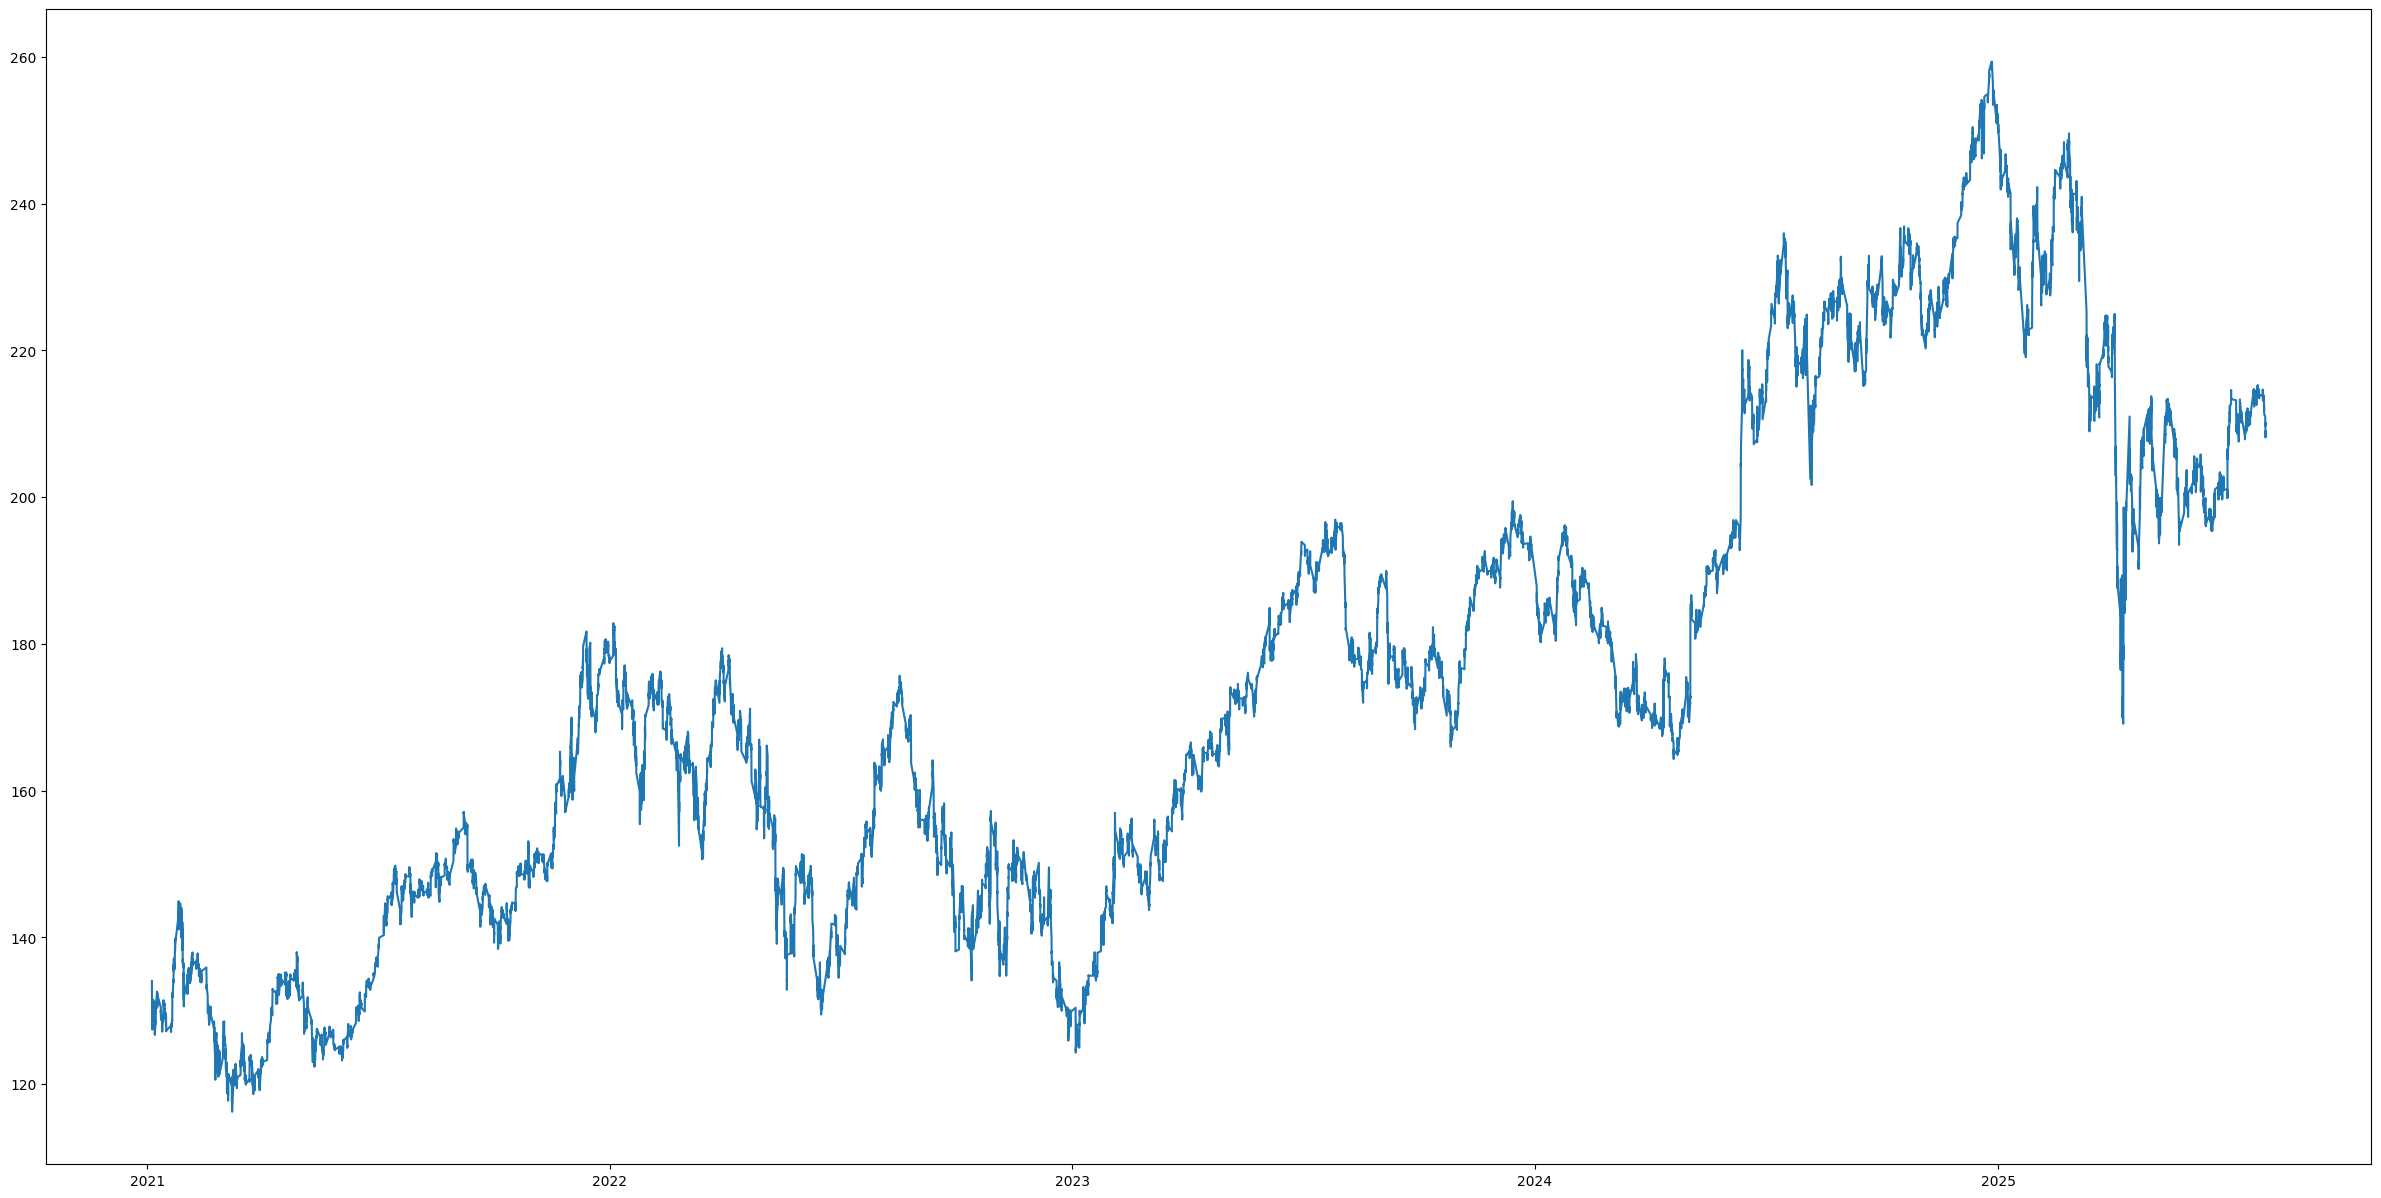

In [11]:
plt.figure(figsize=(30, 15))
plt.plot(df_cut['time'], df_cut['close'])
plt.show()

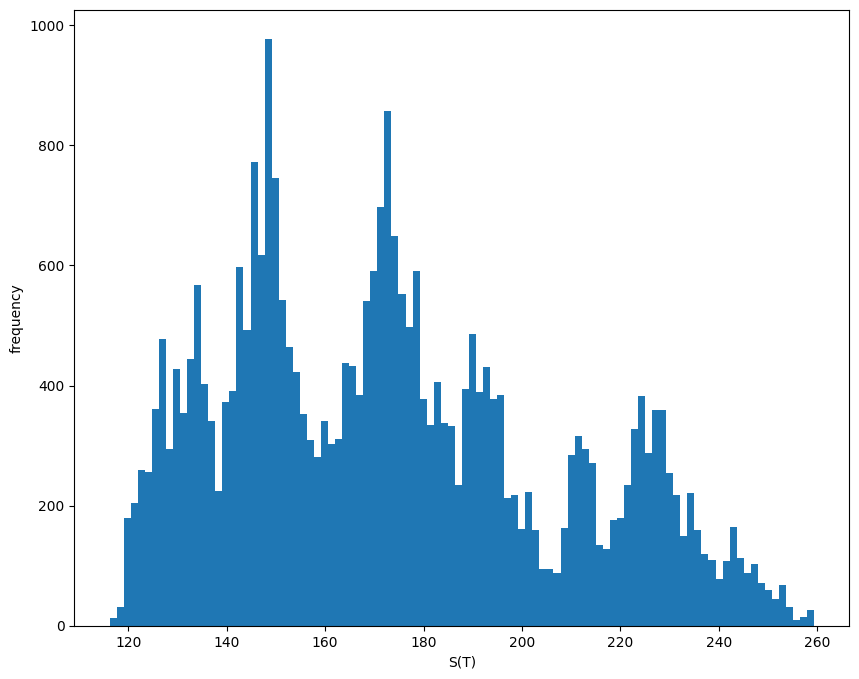

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(df_cut['close'], bins=100)
plt.xlabel("S(T)")
plt.ylabel("frequency")
plt.show()

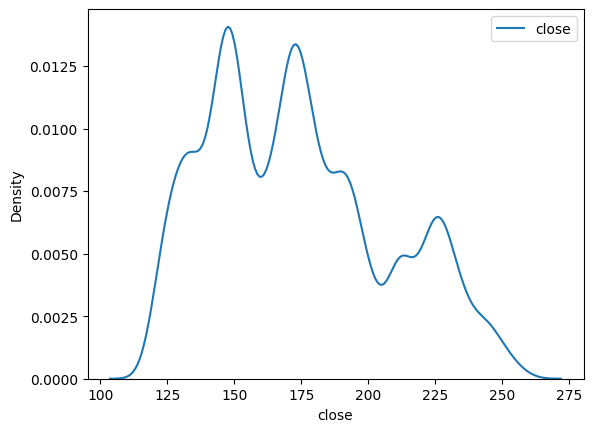

In [13]:
sns.kdeplot(df_cut['close'], label="close")

# Force ticks to appear
plt.xticks(fontsize=10)   # adjust size so they’re visible
plt.yticks(fontsize=10)

# Optional: control spacing of ticks
plt.locator_params(axis='x', nbins=8)
plt.locator_params(axis='y', nbins=6)

plt.legend()
plt.show()

The KDE plot shows atleast 3 modes where each peak corresponds to a price level where the asset spends a lot of time (or where returns concentrate).These ranges include ~145 - 150, ~160-180, ~220-226 Judging from the pattern in apple stock price over time, these modes suggests:



1.   Regimes: The price switching between low and high prices
2.   Support and Resistance levels: the peaks (~145 - 150, ~160-180) align with price levels where the asset frequently consolidates, judging from the structure and movement in stock price.
3. Structural Breaks:the market may have shifted due to events (earnings, macroeconomic shocks, policy changes, etc.). the price areas that can be looked are the dips between peaks where prices rarely stayed in the middle zone - asset likely jumped between regimes rather than smoothly drifting. both cases can be considered.
4. Volatility clustering : multimodality can reflect the market flipping between “calm” and “volatile” states which we will analyse later.


This KDE shows that Apple's closing prices are not normally distributed, but instead cluster around 4 price zones. That’s important, because it tells you volatility isn’t uniform—returns and risks differ depending on which regime the asset is in.

#### IS IT VOLATILE OR STABLE

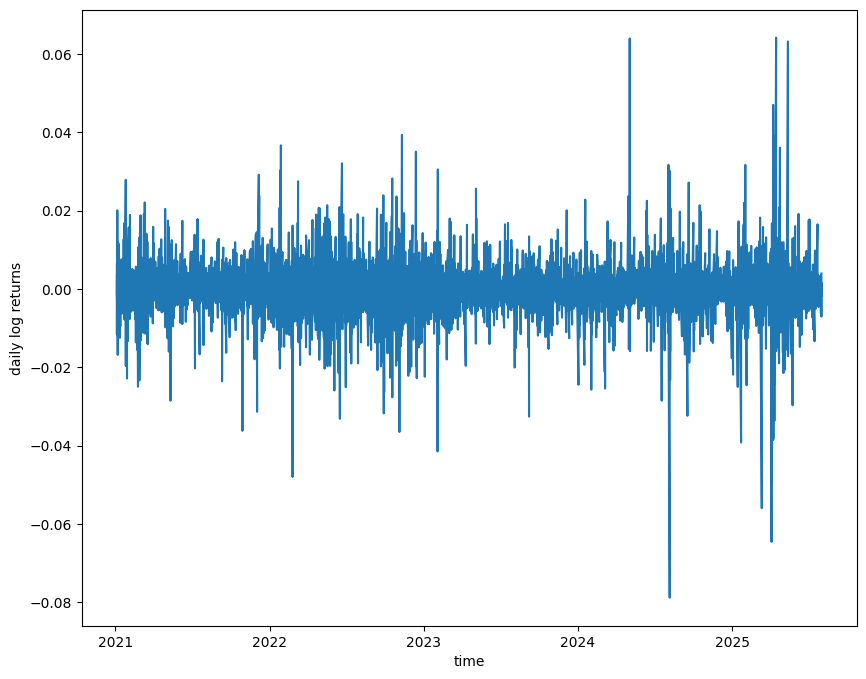

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(df_cut['time'], df_cut['return'])
plt.xlabel("time")
plt.ylabel("daily log returns")
plt.show()

The apple stock is fairly stable but has experienced bouts of volatility from time to time; major price increases and decreases.

#### IS IT LIQUID OR NOT?

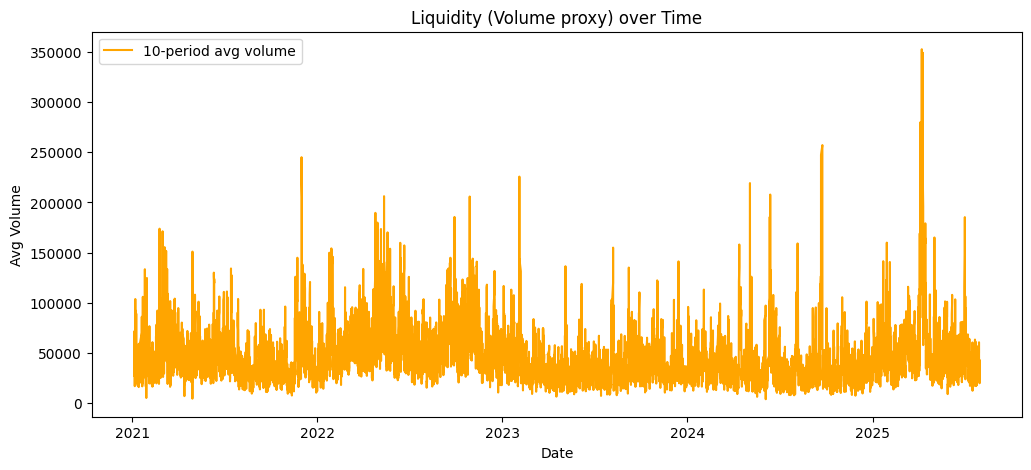

In [15]:
df_cut['liquidity'] = df_cut['volume'].rolling(10).mean()

plt.figure(figsize=(12,5))
plt.plot(df_cut['time'], df_cut['liquidity'], color='orange', label=f'{10}-period avg volume')
plt.title("Liquidity (Volume proxy) over Time")
plt.xlabel("Date")
plt.ylabel("Avg Volume")
plt.legend()
plt.show()

The Apple stock is highly liquid, as trading volumes are really high.

#### ARE THERE OBVIOUS REGIMES OR SHIFTS?

Plot the price, volatility, volume. Look for distinct phases. These often explain why certain signals work only part of the time.

In [16]:
ann_factor = 252 * 26  # = 6552

df_cut['rolling_mean_6552']= df_cut['return'].rolling(252*26).mean().apply(lambda x: x * ann_factor)
df_cut['MA_1year'] = df_cut['close'].rolling(window=252*26).mean()
df_cut['rolling_vol_6552']= df_cut['return'].rolling(252*26).var().apply(lambda x:x**0.5*np.sqrt(ann_factor))
df_cut['rolling_volume_6552']= df_cut['volume'].rolling(252*26).mean()
df_cut['rolling_corr_6552']= df_cut['rolling_vol_6552'].rolling(252*26).corr(df_cut['rolling_mean_6552'])

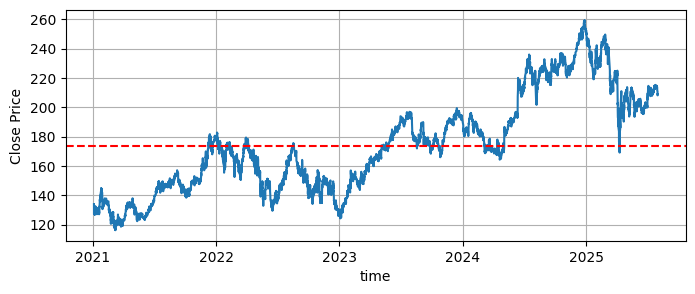

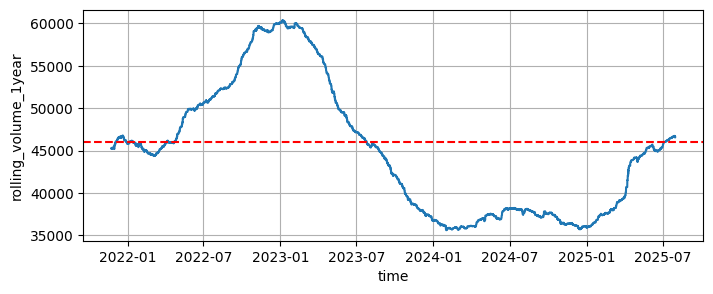

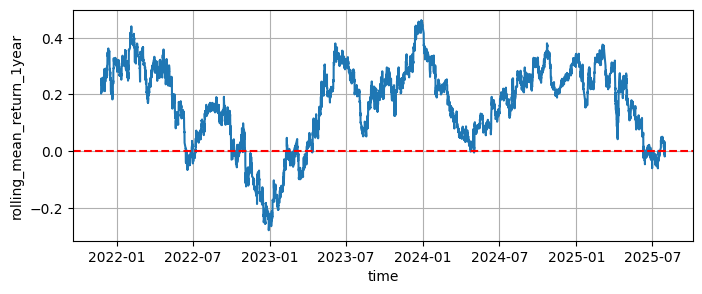

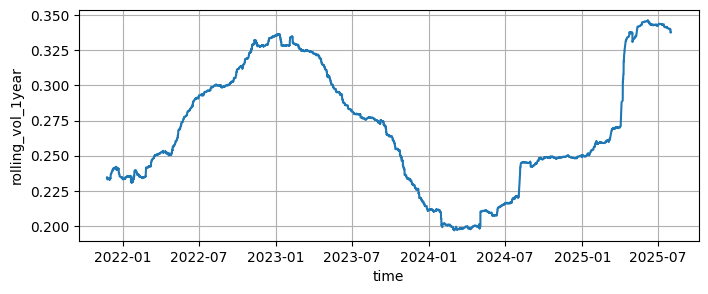

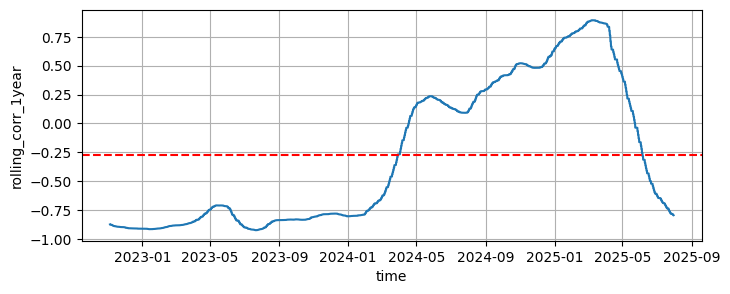

In [17]:
plt.figure(figsize=(8,3))
plt.grid()
plt.plot(df_cut['time'], df_cut['close'])
plt.axhline(y=df_cut['close'].mean(), color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("Close Price")
plt.show()

plt.figure(figsize=(8,3))
plt.grid()
plt.plot(df_cut['time'], df_cut['rolling_volume_6552'])
plt.axhline(y=df_cut['volume'].mean(), color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("rolling_volume_1year")
plt.show()

plt.figure(figsize=(8,3))
plt.grid()
plt.plot(df_cut['time'], df_cut['rolling_mean_6552'])
plt.axhline(y=0.0, color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("rolling_mean_return_1year")
plt.show()

plt.figure(figsize=(8,3))
plt.grid()
plt.plot(df_cut['time'], df_cut['rolling_vol_6552'])
#plt.axhline(y=round(df_cut['raer_vol'].iloc[-1],6), color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("rolling_vol_1year")
plt.show()

plt.figure(figsize=(8,3))
plt.grid()
plt.plot(df_cut['time'], df_cut['rolling_corr_6552'])
plt.axhline(y=df_cut['rolling_corr_6552'].mean(), color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("rolling_corr_1year")
plt.show()

### WHAT'S THE RETURN DISTRIBUTION LIKE?

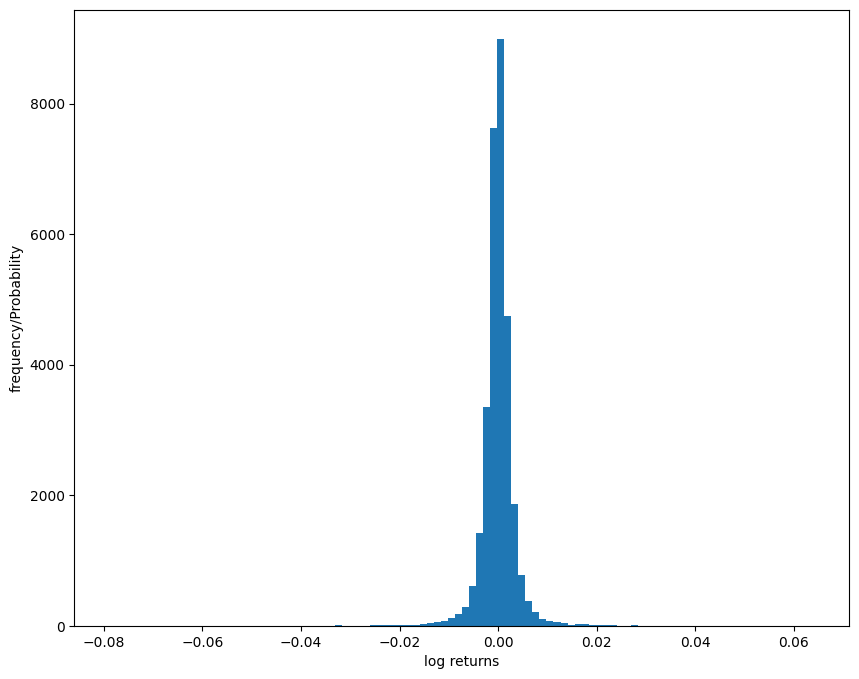

In [18]:
plt.figure(figsize=(10, 8))
plt.hist(df_cut['return'], bins=100)
plt.xlabel("log returns")
plt.ylabel("frequency/Probability")
plt.show()

The returns of the stock cluster around zero majority of the time. Its tails are flat, but slightly skewed to the left.

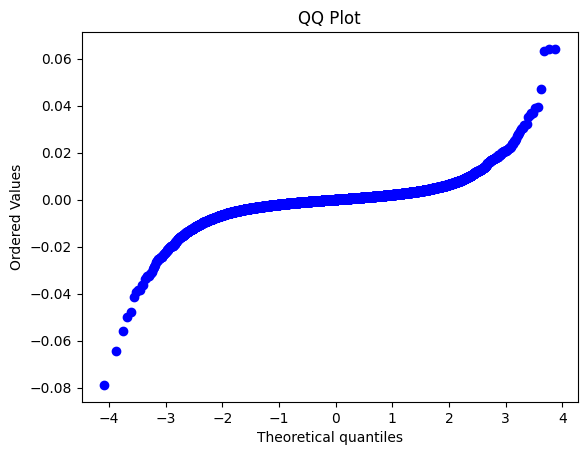

In [19]:
# Generate the QQ plot
stats.probplot(df_cut['return'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

In [20]:
res = stats.jarque_bera(df_cut['return'].dropna())
res.statistic
res.pvalue
print(res.pvalue)

0.0


In [21]:
df_cut['return'].kurtosis()

np.float64(45.247925323313254)

In [22]:
df_cut['return'].skew()

np.float64(-0.3817522247086954)

### Can I simplify the problem by conditioning?

INTRADAY ANALYSIS

In [30]:
start_time = pd.to_datetime("2021-01-01 12:00").tz_localize("UTC")
df_intra = df_cut[df_cut.time >= start_time].reset_index()
df_intra.index = df_intra.time

#drop columns
df_intra.drop(columns=['rolling_mean_6552', 'MA_1year','rolling_vol_6552', 'rolling_volume_6552', 'rolling_corr_6552'], inplace=True)

Correlation matrix of features vs future returns:
                            1         3         5         10
rolling_mean_20_slow -0.004314  0.002859  0.002182 -0.006919
rolling_mean_5_fast  -0.015534  0.002836   0.00595  0.003828
rolling_vol_20_slow   0.001657 -0.001019  -0.00074 -0.000899
rolling_vol_5_fast    0.003303  0.003759 -0.002146 -0.003385


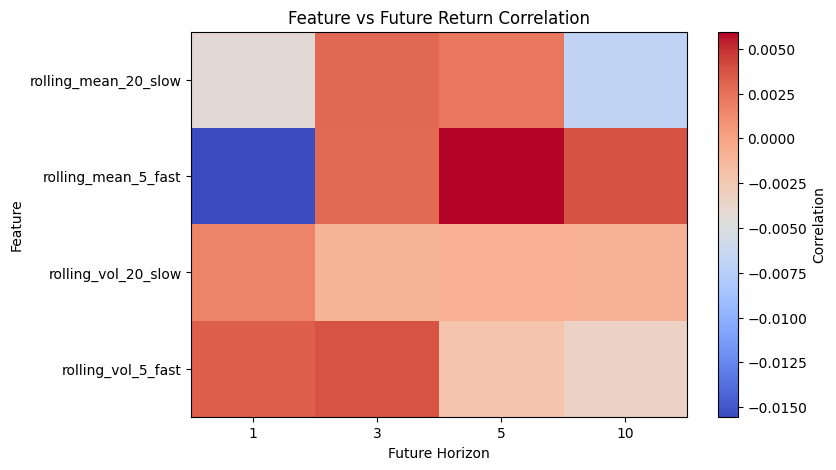

In [33]:

# Rolling features
df_intra['rolling_mean_20_slow'] = df_intra['return'].rolling(20).mean()
df_intra['rolling_vol_20_slow']  = df_intra['return'].rolling(20).std()
df_intra['rolling_mean_5_fast']  = df_intra['return'].rolling(5).mean()
df_intra['rolling_vol_5_fast']   = df_intra['return'].rolling(5).std()

# Features to test
features = [
    'rolling_mean_20_slow',
    'rolling_mean_5_fast',
    'rolling_vol_20_slow',
    'rolling_vol_5_fast']

# Future return horizons
future_horizons = [1, 3, 5, 10]

# Store correlations in DataFrame
corr_results = pd.DataFrame(index=features, columns=future_horizons)

for feature in features:
    for h in future_horizons:
        corr = df_intra[feature].corr(df_intra['return'].shift(-h))
        corr_results.loc[feature, h] = corr

print("Correlation matrix of features vs future returns:")
print(corr_results)

# Optional: visualize as heatmap
plt.figure(figsize=(8,5))
plt.imshow(corr_results.astype(float), cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(future_horizons)), future_horizons)
plt.yticks(range(len(features)), features)
plt.title("Feature vs Future Return Correlation")
plt.xlabel("Future Horizon")
plt.ylabel("Feature")
plt.show()




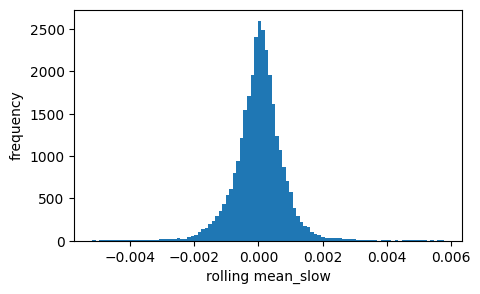

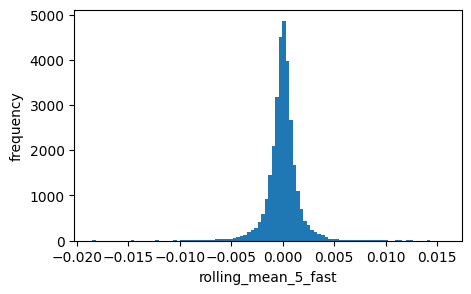

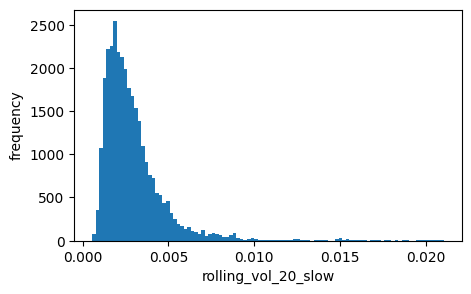

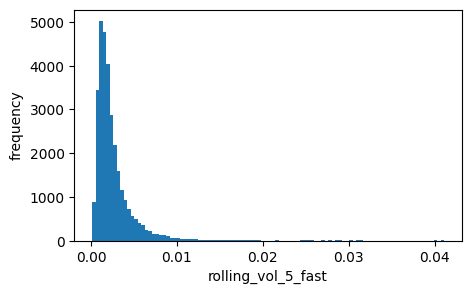

In [70]:
plt.figure(figsize=(5, 3))
plt.hist(df_intra['rolling_mean_20_slow'], bins=100)
plt.xlabel("rolling mean_slow")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(df_intra['rolling_mean_5_fast'], bins=100)
plt.xlabel("rolling_mean_5_fast")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(df_intra['rolling_vol_20_slow'], bins=100)
plt.xlabel("rolling_vol_20_slow")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(df_intra['rolling_vol_5_fast'], bins=100)
plt.xlabel("rolling_vol_5_fast")
plt.ylabel("frequency")
plt.show()

In [43]:
# Show all rows
pd.set_option('display.max_rows', 50)
# Show all columns (optional)
pd.set_option('display.max_columns', None)

# Window size for rolling correlation
corr_window = 50   # <-- you can tune this

# Store results in dict of DataFrames
rolling_corrs = {}

for feature in features:
    for h in future_horizons:
        col_name = f"{feature}_vs_ret_t+{h}"
        # rolling correlation
        rolling_corrs[col_name] = (df_cut[feature].rolling(corr_window).corr(df_cut['return'].shift(-h)))

# Combine into a DataFrame
rolling_corr_df = pd.DataFrame(rolling_corrs).dropna()
rolling_corr_df.index = df_cut.loc[rolling_corr_df.index, 'time']
rolling_corr_df.head(10)
#print(rolling_corr_df.tail(50))

,rolling_mean_20_slow_vs_ret_t+1,rolling_mean_20_slow_vs_ret_t+3,rolling_mean_20_slow_vs_ret_t+5,rolling_mean_20_slow_vs_ret_t+10,rolling_mean_5_fast_vs_ret_t+1,rolling_mean_5_fast_vs_ret_t+3,rolling_mean_5_fast_vs_ret_t+5,rolling_mean_5_fast_vs_ret_t+10,rolling_vol_20_slow_vs_ret_t+1,rolling_vol_20_slow_vs_ret_t+3,rolling_vol_20_slow_vs_ret_t+5,rolling_vol_20_slow_vs_ret_t+10,rolling_vol_5_fast_vs_ret_t+1,rolling_vol_5_fast_vs_ret_t+3,rolling_vol_5_fast_vs_ret_t+5,rolling_vol_5_fast_vs_ret_t+10
time,,,,,,,,,,,,,,,,
2021-01-06 14:15:00+00:00,0.008097,-0.062207,-0.130268,-0.092293,0.005550,-0.119275,-0.196573,-0.160291,0.068103,0.150904,0.251844,-0.123432,-0.115585,-0.121497,-0.008148,0.085879
2021-01-06 14:30:00+00:00,-0.004743,-0.060896,-0.144723,-0.089947,-0.020546,-0.142199,-0.208165,-0.169931,0.065729,0.144378,0.251227,-0.127384,-0.137207,-0.152750,-0.018956,0.070180
2021-01-06 14:45:00+00:00,-0.023677,-0.086662,-0.171923,-0.070456,-0.022392,-0.134400,-0.224257,-0.182083,0.070846,0.151584,0.250984,-0.134489,-0.134900,-0.151963,-0.014066,0.069215
2021-01-06 15:00:00+00:00,-0.012040,-0.095839,-0.140347,-0.107410,-0.022941,-0.131769,-0.235295,-0.177192,0.069581,0.154189,0.242363,-0.128143,-0.131535,-0.151153,-0.010731,0.066010
2021-01-06 15:15:00+00:00,-0.035732,-0.109121,-0.172496,-0.146258,-0.011017,-0.102949,-0.231365,-0.164882,0.078019,0.164444,0.247919,-0.119403,-0.136075,-0.139828,-0.018630,0.059308
2021-01-06 15:30:00+00:00,-0.041787,-0.072443,-0.195846,-0.151680,0.002680,-0.112494,-0.229021,-0.159764,0.082118,0.153062,0.252254,-0.119707,-0.136243,-0.134224,-0.020745,0.059858
2021-01-06 15:45:00+00:00,-0.061047,-0.105449,-0.194922,-0.172216,0.057604,-0.123799,-0.208125,-0.201585,0.094640,0.158448,0.251976,-0.122895,-0.151025,-0.135526,-0.022525,0.070124
2021-01-06 16:00:00+00:00,-0.031643,-0.118870,-0.183126,-0.163464,0.050122,-0.123208,-0.208683,-0.174139,0.089828,0.157307,0.246913,-0.115390,-0.142787,-0.138922,-0.016939,0.074008
2021-01-06 16:15:00+00:00,-0.042639,-0.115703,-0.201663,-0.163655,0.040739,-0.109241,-0.214874,-0.185614,0.084990,0.162213,0.241662,-0.122093,-0.148482,-0.135615,-0.024355,0.072154


In [44]:
rolling_corr_df.tail(10)

,rolling_mean_20_slow_vs_ret_t+1,rolling_mean_20_slow_vs_ret_t+3,rolling_mean_20_slow_vs_ret_t+5,rolling_mean_20_slow_vs_ret_t+10,rolling_mean_5_fast_vs_ret_t+1,rolling_mean_5_fast_vs_ret_t+3,rolling_mean_5_fast_vs_ret_t+5,rolling_mean_5_fast_vs_ret_t+10,rolling_vol_20_slow_vs_ret_t+1,rolling_vol_20_slow_vs_ret_t+3,rolling_vol_20_slow_vs_ret_t+5,rolling_vol_20_slow_vs_ret_t+10,rolling_vol_5_fast_vs_ret_t+1,rolling_vol_5_fast_vs_ret_t+3,rolling_vol_5_fast_vs_ret_t+5,rolling_vol_5_fast_vs_ret_t+10
time,,,,,,,,,,,,,,,,
2025-07-30 15:00:00+00:00,-0.164833,-0.040748,0.000137,-0.012631,-0.307946,0.141884,-0.138324,0.016942,0.127737,0.097229,0.036517,-0.058460,0.033673,-0.051795,0.062032,0.060867
2025-07-30 15:15:00+00:00,-0.202343,-0.037805,0.025849,-0.004766,-0.321672,0.143621,-0.128572,0.019709,0.124566,0.088918,0.026611,-0.054108,0.046785,-0.059618,0.046642,0.061875
2025-07-30 15:30:00+00:00,-0.249652,-0.051010,0.090780,0.046864,-0.340765,0.138454,-0.098501,0.044278,0.115205,0.089334,0.022347,-0.059440,0.060130,-0.055821,0.019305,0.039588
2025-07-30 15:45:00+00:00,-0.250702,-0.021503,0.057056,0.061177,-0.336505,0.150229,-0.118914,0.068028,0.107678,0.078692,0.045477,-0.090355,0.054523,-0.076438,0.045622,0.024637
2025-07-30 16:00:00+00:00,-0.269774,0.037297,0.039461,0.032604,-0.339525,0.160084,-0.109135,0.057391,0.108919,0.072265,0.025430,-0.075610,0.060985,-0.108335,0.049318,0.044528
2025-07-30 16:15:00+00:00,-0.251059,-0.001645,-0.013301,0.074217,-0.330513,0.139537,-0.080695,-0.066496,0.098203,0.096944,0.025524,-0.008673,0.048477,-0.082535,0.044834,0.118044
2025-07-30 16:30:00+00:00,-0.193891,-0.023960,-0.008941,0.010092,-0.351899,0.170014,-0.086095,-0.062051,0.093525,0.075270,0.029597,0.018895,0.048104,-0.107116,0.049850,0.147172
2025-07-30 16:45:00+00:00,-0.225626,-0.084061,0.043636,-0.040821,-0.342403,0.186355,-0.103663,-0.046869,0.112794,0.072788,0.025265,0.020086,0.064999,-0.102873,0.042040,0.152957
2025-07-30 17:00:00+00:00,-0.267671,-0.076593,0.040524,-0.010559,-0.354110,0.189382,-0.124142,-0.038157,0.090589,0.076812,-0.002502,0.029037,0.040103,-0.097645,0.016475,0.163127


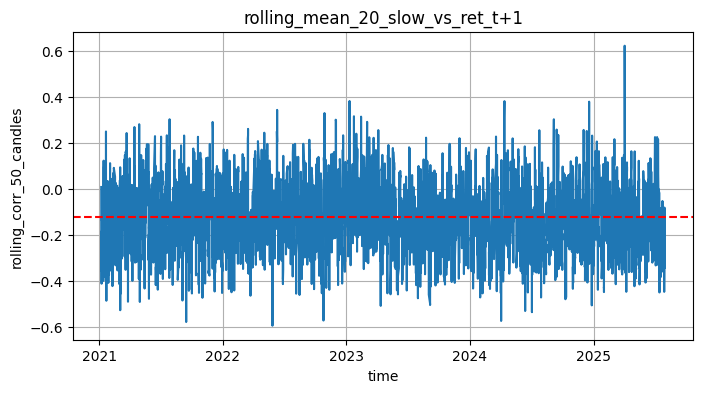

In [46]:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(rolling_corr_df.index, rolling_corr_df['rolling_mean_20_slow_vs_ret_t+1'])
plt.axhline(y=(rolling_corr_df['rolling_mean_20_slow_vs_ret_t+1']).mean(), color='r', linestyle='--', label='mean')
plt.xlabel("time")
plt.ylabel("rolling_corr_50_candles")
plt.title('rolling_mean_20_slow_vs_ret_t+1')
plt.show()

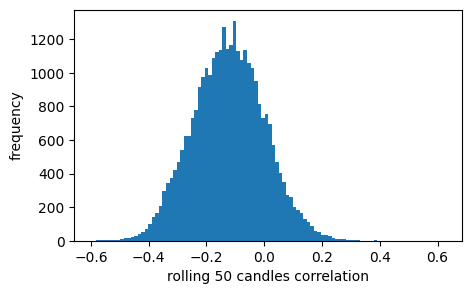

In [49]:
plt.figure(figsize=(5, 3))
plt.hist(rolling_corr_df['rolling_mean_20_slow_vs_ret_t+1'], bins=100)
plt.xlabel("rolling 50 candles correlation")
plt.ylabel("frequency")
plt.show()

In [55]:
df_intra.columns

Index(['index', 'time', 'close', 'high', 'low', 'n', 'open', 'volume', 'vw',
       'return', 'liquidity', 'rolling_mean_20_slow', 'rolling_vol_20_slow',
       'rolling_mean_5_fast', 'rolling_vol_5_fast', 'rolling_mean_5',
       'rolling_mean_20'],
      dtype='object')

In [56]:
df_intra = MACD(df_cut)
df_intra = Bollingerbands(df_cut)
df_intra = ATR(df_cut)
df_intra = RSI(df_cut)
df_intra = stochastic(df_cut)
df_intra = ADX(df_cut)
#df_intra['rolling_volatility_14d'] = df_intra['return'].rolling(window=14).std()

In [57]:
df_intra.columns

Index(['time', 'close', 'high', 'low', 'n', 'open', 'volume', 'vw', 'return',
       'liquidity', 'rolling_mean_6552', 'MA_1year', 'rolling_vol_6552',
       'rolling_volume_6552', 'rolling_corr_6552', 'rolling_mean_20_slow',
       'rolling_vol_20_slow', 'rolling_mean_5_fast', 'rolling_vol_5_fast',
       'rolling_mean_5', 'rolling_mean_20', 'macd', 'signal', 'UB', 'LB',
       'BB_Width', 'ATR', 'rsi', 'change_K', 'change_D', 'ADX',
       'rolling_volatility_14d', 'return_sign'],
      dtype='object')

In [58]:
df_intra['return_sign'] = np.where(df_intra['return'] > 0, 1, -1)

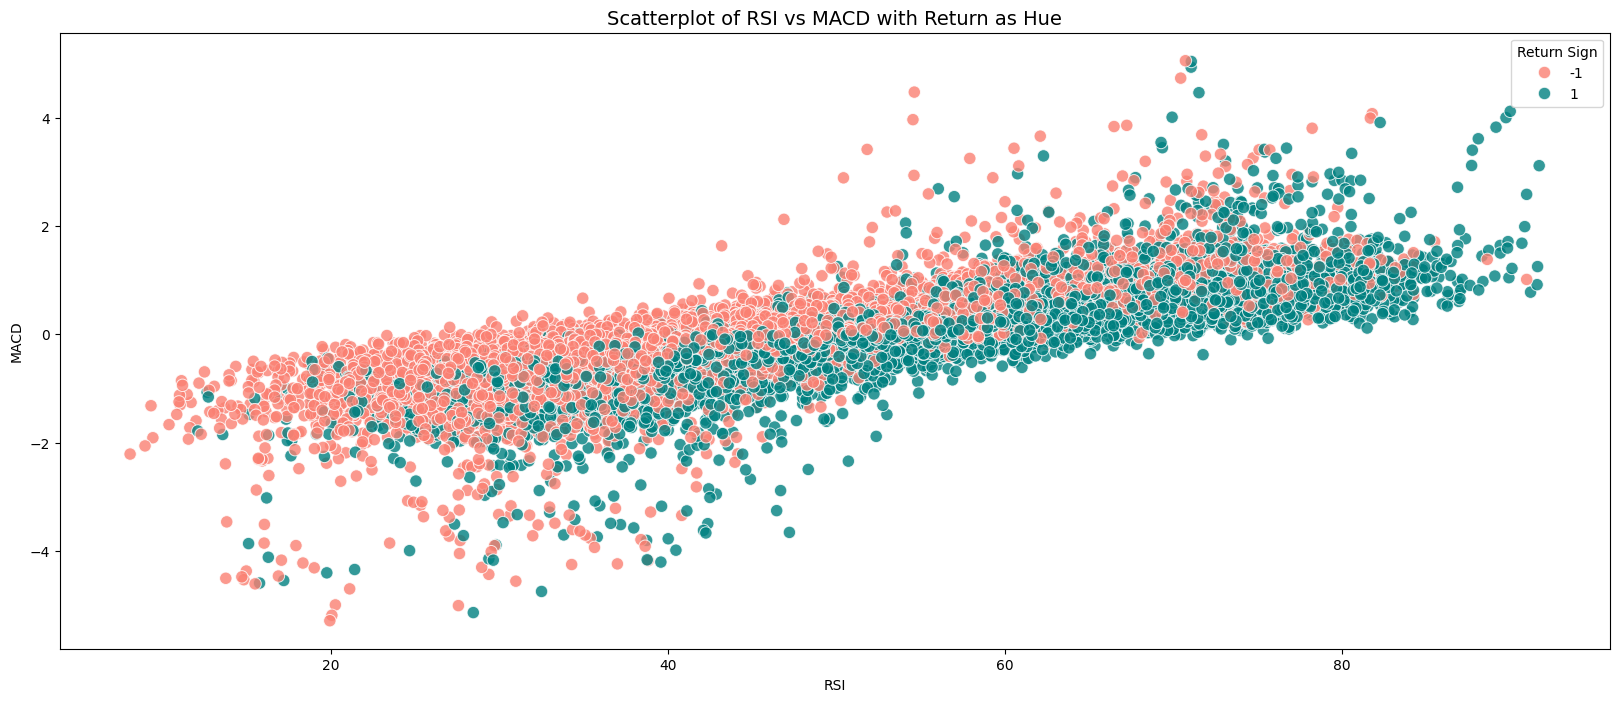

In [59]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_intra, x='rsi', y='macd', hue='return_sign',palette={1:'teal',-1:'salmon'},alpha=0.8, s=80)
plt.title('Scatterplot of RSI vs MACD with Return as Hue', fontsize=14)
plt.xlabel('RSI')
plt.ylabel('MACD')
plt.legend(title='Return Sign')
plt.show()

In [ ]:
import itertools

In [ ]:
# features = [x for x in df_cut.columns if x not in ['time','high','low','close','n','open','return','raer_vol','raer_var','return_sign','vw','rolling_mean_6552', 'MA_1year', 'rolling_vol_6552',
#        'rolling_volume_6552', 'rolling_corr_6552',]]
# for i, j in itertools.combinations(features, 2):
#     plt.figure(figsize=(20, 8))
#     sns.scatterplot(data=df_cut, x=i, y=j, hue='return_sign',palette={1:'teal',-1:'salmon'},alpha=0.8, s=80)
#     plt.title(f'Scatterplot of {i} vs {j} with Return as Hue', fontsize=14)
#     plt.xlabel(f'{i}')
#     plt.ylabel(f'{j}')
#     plt.legend(title='Return Sign')
#     plt.show()


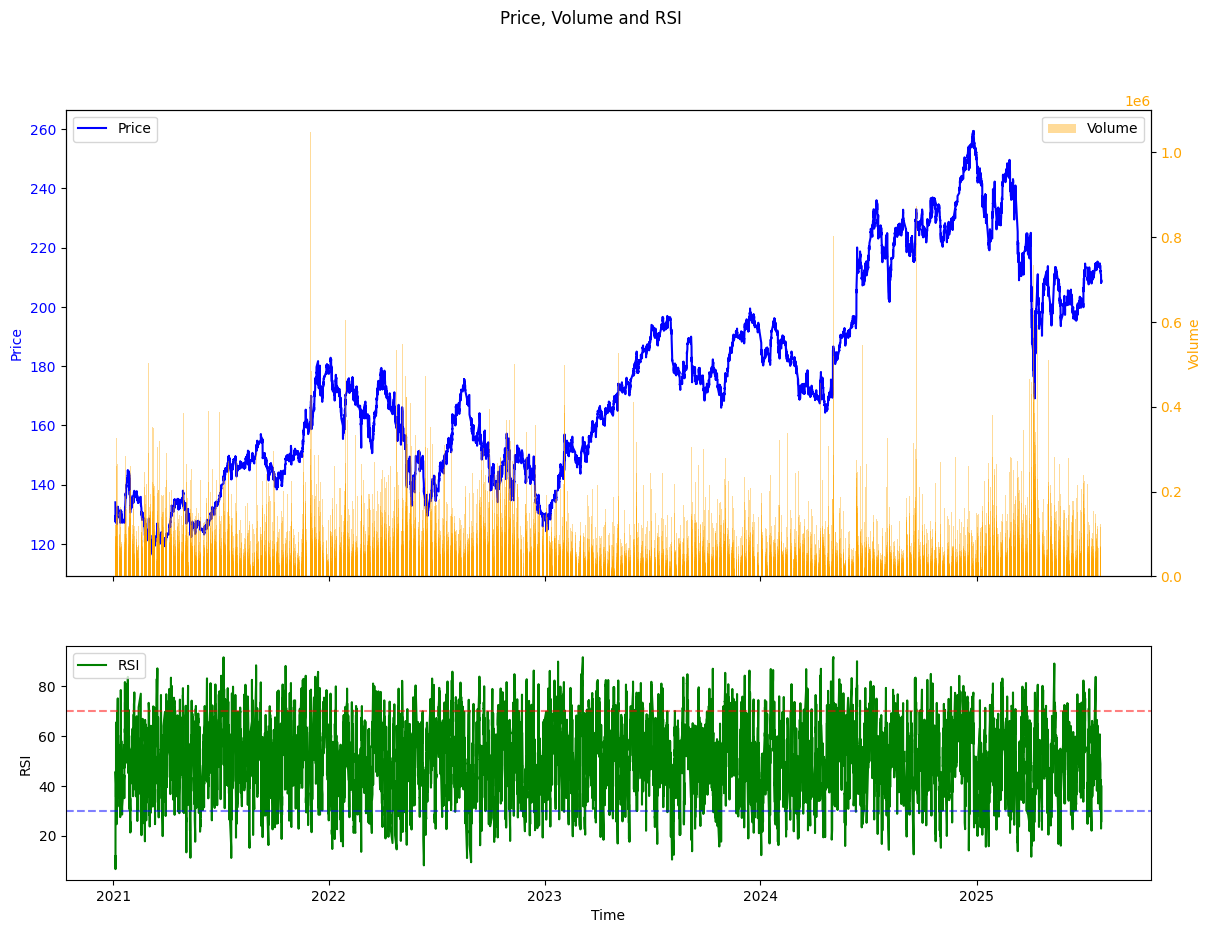

In [60]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (stacked vertically)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# --- Price (left y-axis) ---
ax1.plot(df_intra['time'], df_intra['close'], color='blue', label='Price')
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# --- Volume (right y-axis) ---
ax2 = ax1.twinx()
ax2.bar(df_intra['time'], df_intra['volume'], color='orange', alpha=0.4, width=1.0, label='Volume')
ax2.set_ylabel("Volume", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# --- RSI subplot ---
ax3.plot(df_intra['time'], df_intra['rsi'], color='green', label='RSI')
ax3.axhline(70, color='red', linestyle='--', alpha=0.5)   # overbought line
ax3.axhline(30, color='blue', linestyle='--', alpha=0.5)  # oversold line
ax3.set_ylabel("RSI")
ax3.set_xlabel("Time")

# --- Legends ---
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='upper left')

plt.suptitle("Price, Volume and RSI")
plt.show()


In [61]:
df_intra.columns

Index(['time', 'close', 'high', 'low', 'n', 'open', 'volume', 'vw', 'return',
       'liquidity', 'rolling_mean_6552', 'MA_1year', 'rolling_vol_6552',
       'rolling_volume_6552', 'rolling_corr_6552', 'rolling_mean_20_slow',
       'rolling_vol_20_slow', 'rolling_mean_5_fast', 'rolling_vol_5_fast',
       'rolling_mean_5', 'rolling_mean_20', 'macd', 'signal', 'UB', 'LB',
       'BB_Width', 'ATR', 'rsi', 'change_K', 'change_D', 'ADX',
       'rolling_volatility_14d', 'return_sign'],
      dtype='object')

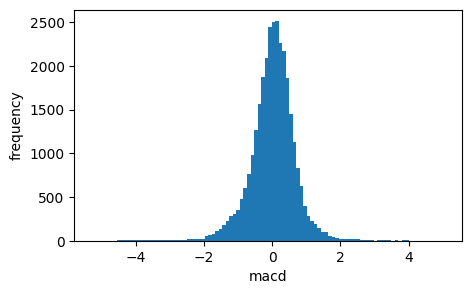

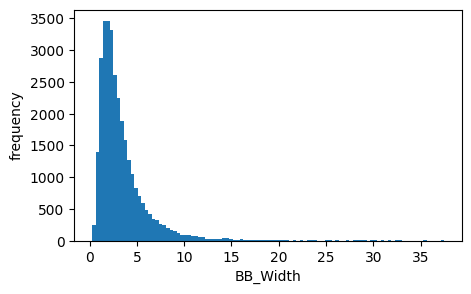

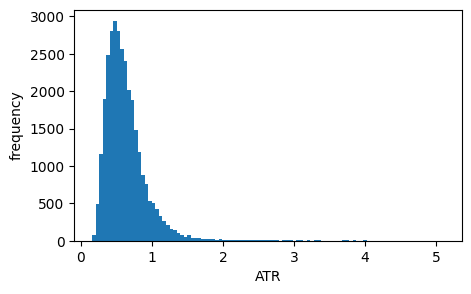

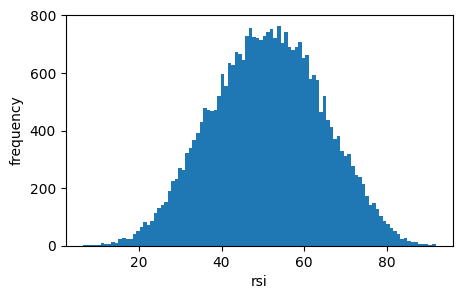

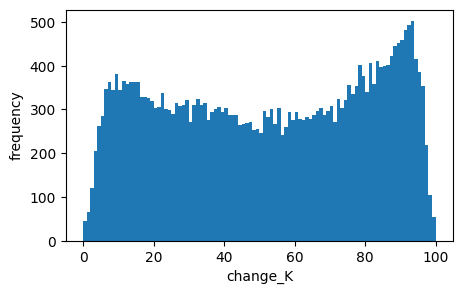

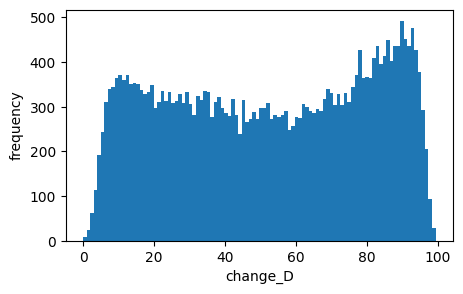

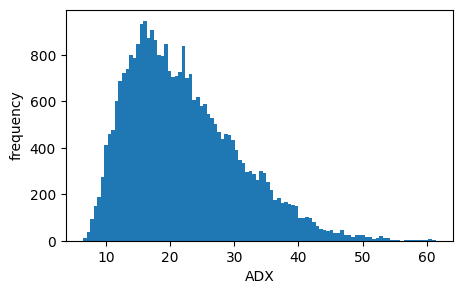

In [77]:
for i in ['macd', 'BB_Width', 'ATR', 'rsi', 'change_K', 'change_D', 'ADX']:
    plt.figure(figsize=(5, 3))
    plt.hist(df_intra[i], bins=100)
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()

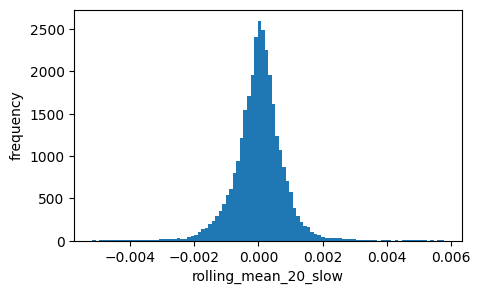

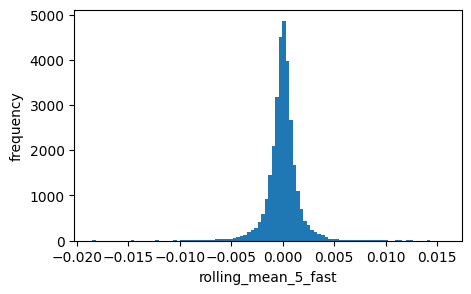

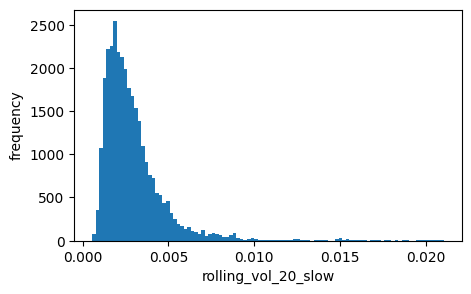

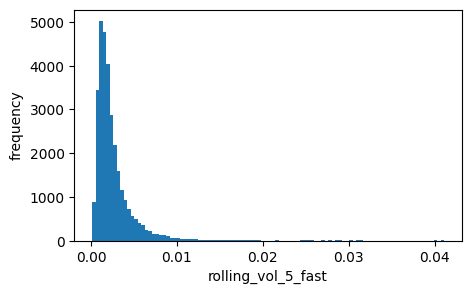

In [78]:
for i in ['rolling_mean_20_slow', 'rolling_mean_5_fast', 'rolling_vol_20_slow', 'rolling_vol_5_fast']:
    plt.figure(figsize=(5, 3))
    plt.hist(df_intra[i], bins=100)
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()



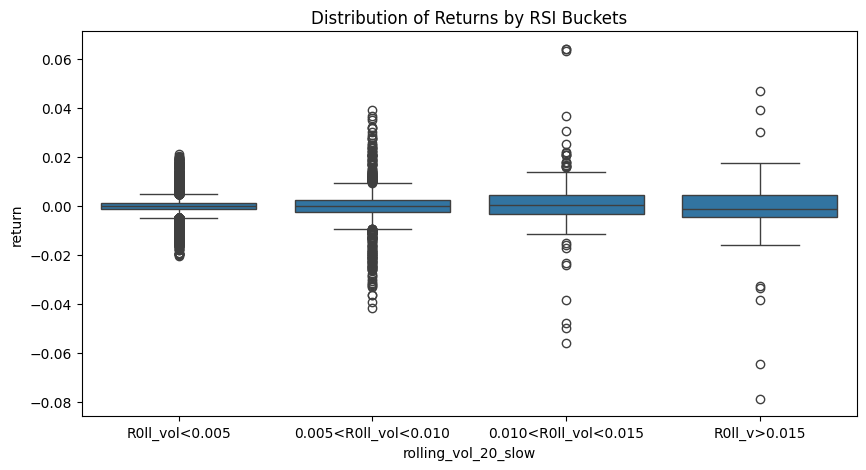

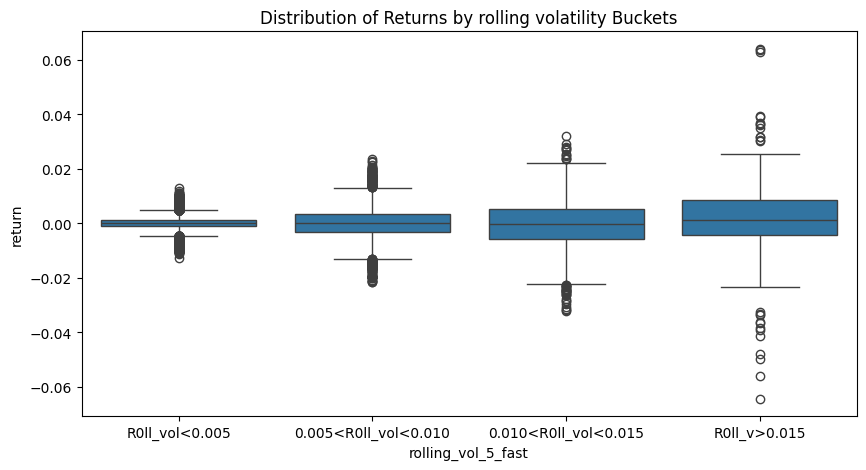

In [79]:
#Distribution of Return by RSI Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_intra['rolling_vol_20_slow'], bins=[0.0,0.005, 0.010, 0.015,0.030], labels=['R0ll_vol<0.005','0.005<R0ll_vol<0.010','0.010<R0ll_vol<0.015','R0ll_v>0.015']),y=df_intra['return'])
plt.title("Distribution of Returns by RSI Buckets")
plt.show()

# Distribution of Return by rolling volatility Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_intra['rolling_vol_5_fast'], bins=[0.0,0.005, 0.010, 0.015,0.030], labels=['R0ll_vol<0.005','0.005<R0ll_vol<0.010','0.010<R0ll_vol<0.015','R0ll_v>0.015']),y=df_intra['return'])
plt.title("Distribution of Returns by rolling volatility Buckets")
plt.show()

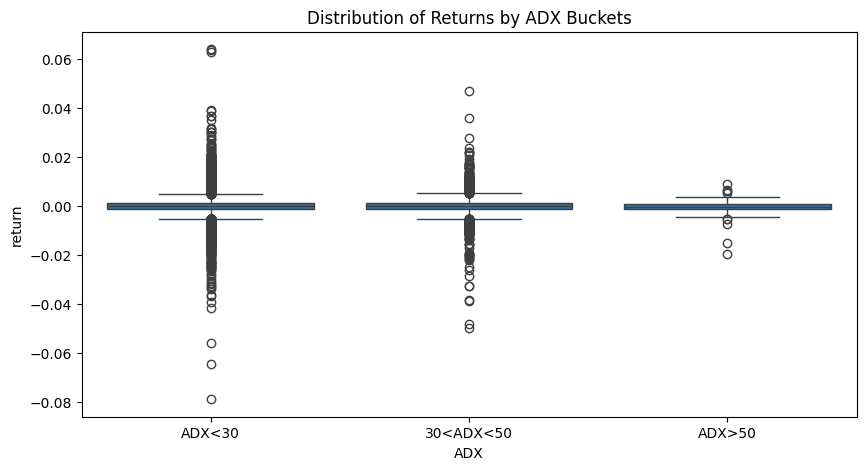

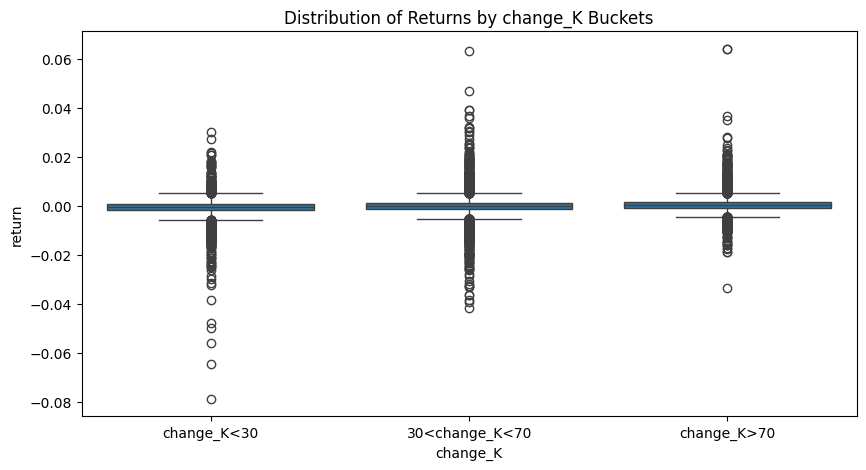

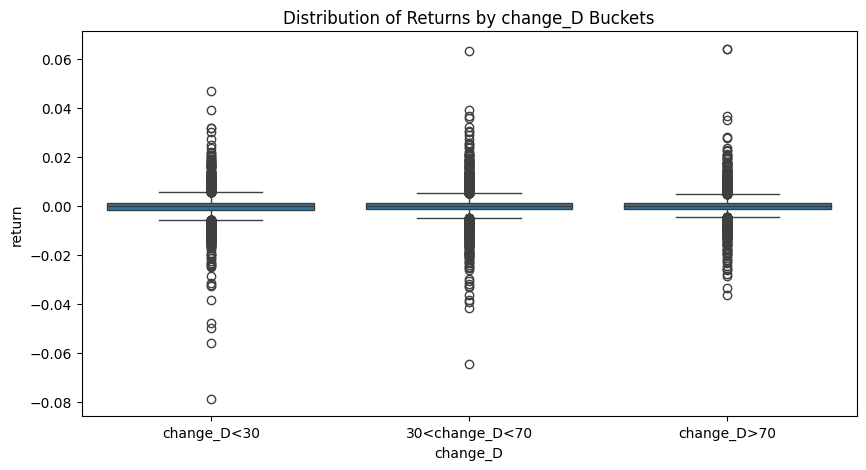

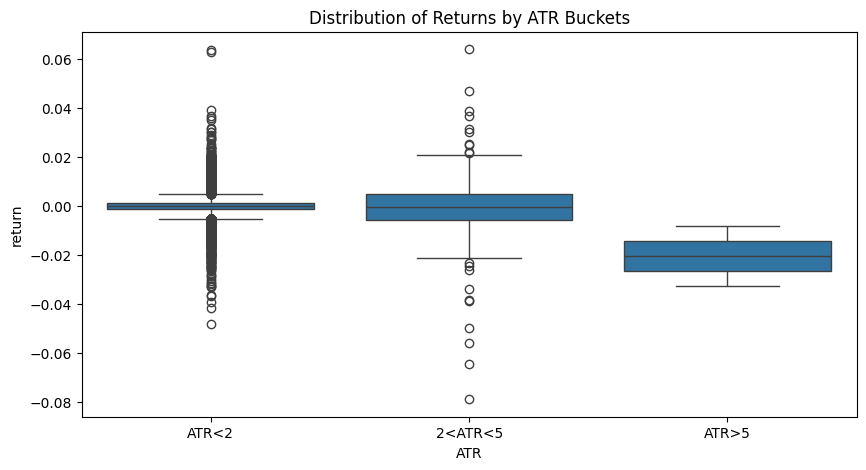

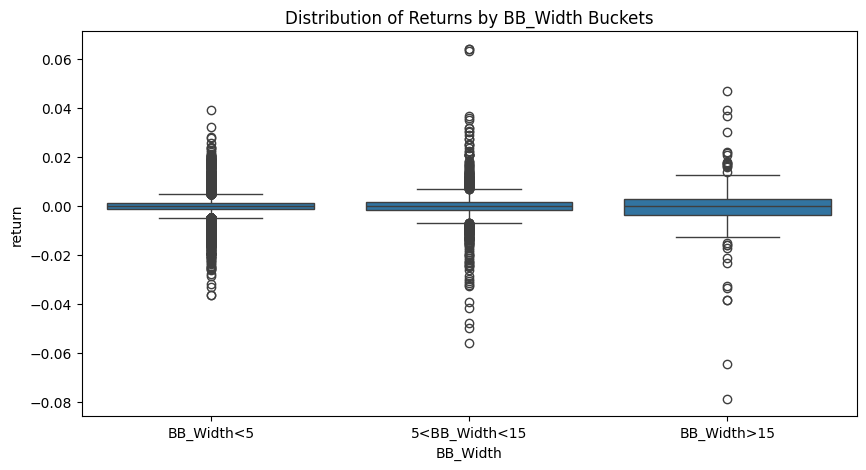

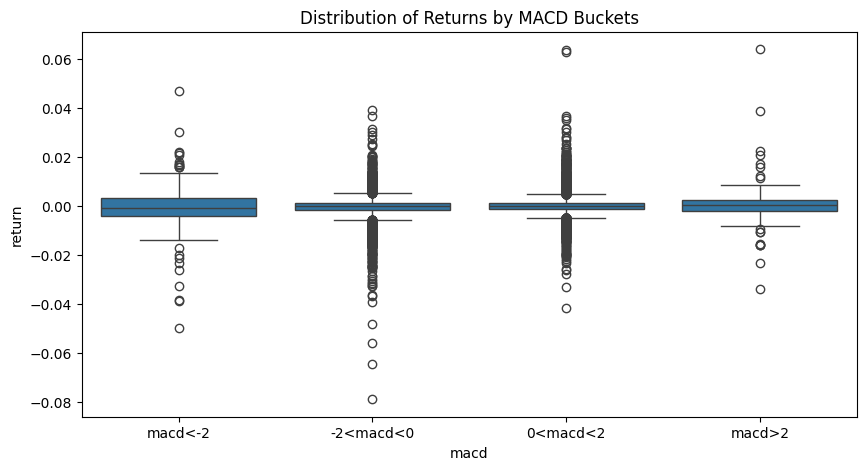

In [83]:
#Distribution of Return by ADX Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['ADX'], bins=[0,30,50,100], labels=['ADX<30','30<ADX<50','ADX>50']),y=df_cut['return'])
plt.title("Distribution of Returns by ADX Buckets")
plt.show()

#Distribution of Return by Change_K Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['change_K'], bins=[0,30,70,100], labels=['change_K<30','30<change_K<70','change_K>70']),y=df_cut['return'])
plt.title("Distribution of Returns by change_K Buckets")
plt.show()

#Distribution of Return by Change_D Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['change_D'], bins=[0,30,70,100], labels=['change_D<30','30<change_D<70','change_D>70']),y=df_cut['return'])
plt.title("Distribution of Returns by change_D Buckets")
plt.show()

#Distribution of Return by ATR Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['ATR'], bins=[0,2,5,10], labels=['ATR<2','2<ATR<5','ATR>5']),y=df_cut['return'])
plt.title("Distribution of Returns by ATR Buckets")
plt.show()

#Distribution of Return by BB_WIDTH Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['BB_Width'], bins=[0,5,15,50], labels=['BB_Width<5','5<BB_Width<15','BB_Width>15']),y=df_cut['return'])
plt.title("Distribution of Returns by BB_Width Buckets")
plt.show()

#Distribution of Return by macd Buckets
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_intra['macd'], bins=[-6,-2, 0, 2,6], labels=['macd<-2','-2<macd<0','0<macd<2','macd>2']),y=df_intra['return'])
plt.title("Distribution of Returns by MACD Buckets")
plt.show()

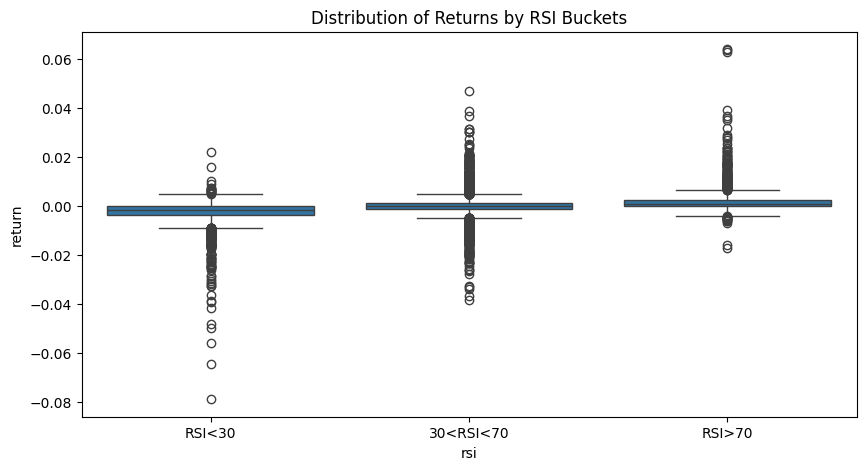

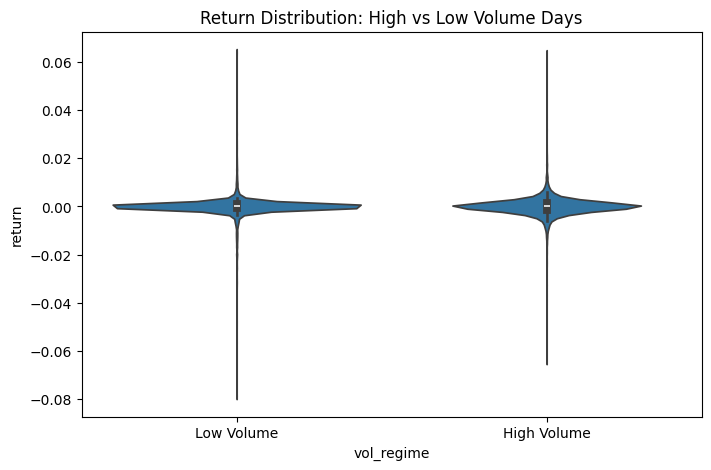

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x=pd.cut(df_cut['rsi'], bins=[0,30,70,100], labels=['RSI<30','30<RSI<70','RSI>70']),
            y=df_cut['return'])
plt.title("Distribution of Returns by RSI Buckets")
plt.show()

# Example for volume
high_vol_days = df_cut['volume'] < df_cut['volume'].quantile(0.25)
df_cut['vol_regime'] = np.where(high_vol_days, 'Low Volume', 'High Volume')

plt.figure(figsize=(8,5))
sns.violinplot(x='vol_regime', y='return', data=df_cut)
plt.title("Return Distribution: High vs Low Volume Days")
plt.show()

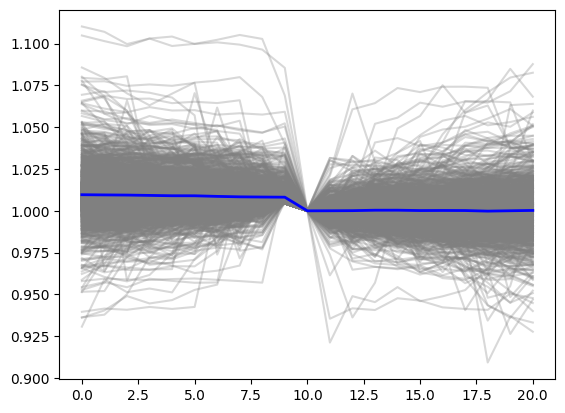

In [84]:
# Define event: large drop days
threshold = df_cut['return'].quantile(0.05)  # bottom 5% returns
event_dates = df_cut.loc[df_cut['return'] < threshold, 'time']

window = 10  # look 10 days before and after
paths = []

for d in event_dates:
    idx = df_cut.index[df_cut['time'] == d][0]
    if idx-window >= 0 and idx+window < len(df_cut):
        segment = df_cut['close'].iloc[idx-window:idx+window+1].reset_index(drop=True)
        segment = segment / segment.iloc[window]  # normalize
        paths.append(segment)

avg_path = pd.concat(paths, axis=1).mean(axis=1)

# plt.figure(figsize=(10,5))
# plt.plot(avg_path.values, label="Average Price Path after Large Drops")
# plt.axvline(window, color='red', linestyle='--', label="Event Day")
# plt.legend()
# plt.show()
for path in paths:
    plt.plot(path, color='gray', alpha=0.3)
plt.plot(avg_path, color='blue', linewidth=2, label="Average")



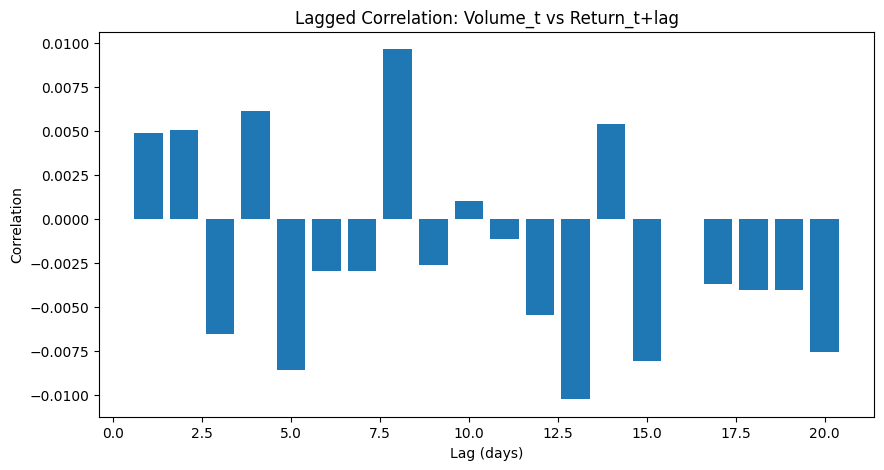

In [ ]:
max_lag = 20
correlations = []
for lag in range(1, max_lag+1):
    corr = df_cut['volume'].corr(df_cut['return'].shift(-lag))
    correlations.append(corr)

plt.figure(figsize=(10,5))
plt.bar(range(1, max_lag+1), correlations)
plt.title("Lagged Correlation: Volume_t vs Return_t+lag")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.show()
